In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.00,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_For'] = (pd.to_datetime("today") - df['Dt_Customer']).dt.days


cat_cols = ['Education', 'Marital_Status']
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [6]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,2,4,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4765
1,2174,1954,2,4,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,4215
2,4141,1965,2,5,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,4414
3,6182,1984,2,5,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,4241
4,5324,1981,4,3,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,4263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,4483
2236,4001,1946,4,5,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,4121
2237,7270,1981,2,2,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,4257
2238,8235,1956,3,5,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,4258


In [7]:
X = df.drop(columns=['ID','Dt_Customer'])

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

silhouette = silhouette_score(X, labels)
print("Silhouette without scaling:", silhouette)

Silhouette without scaling: 0.5378509554122608


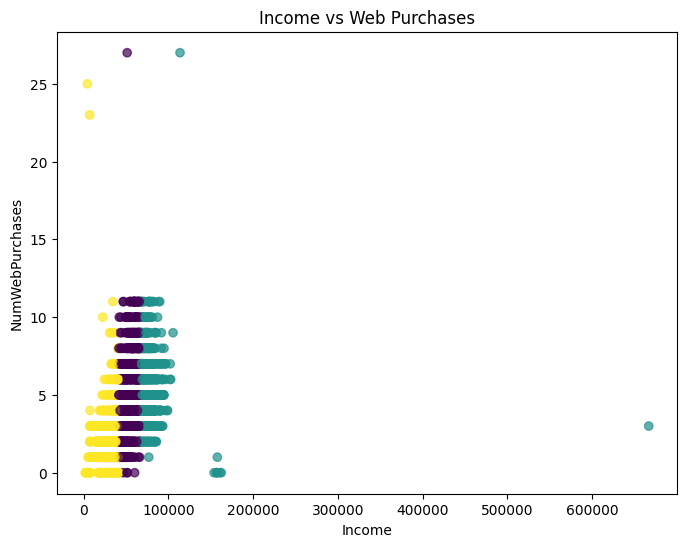

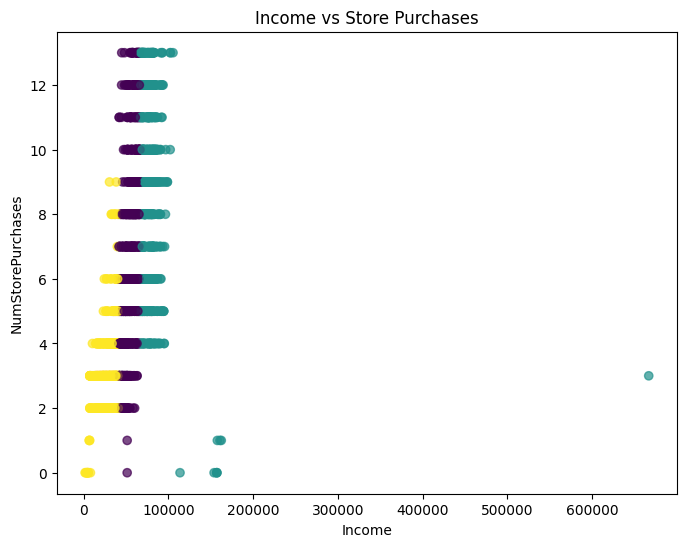

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['NumWebPurchases'], c=labels, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.title("Income vs Web Purchases")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(df['Income'], df['NumStorePurchases'], c=labels, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumStorePurchases")
plt.title("Income vs Store Purchases")
plt.show()

**Most customers are concentrated in the income range up to ~100k. One segment consists of wealthy customers, another of those with medium income, and a third of those with low income.**

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

silhouette_scaled = silhouette_score(X_scaled, labels_scaled)
print("Silhouette after scaling:", silhouette_scaled)

Silhouette after scaling: 0.15762356785090736


**Before scaling, the silhouette score is much higher. After scaling, all features are brought to the same scale and the clusters are no longer as distinct. In this dataset, income is the dominant feature, and without scaling the algorithm separates the segments more effectively.**

In [10]:
q99 = df['Income'].quantile(0.99)
df_clean = df[df['Income'] < q99]

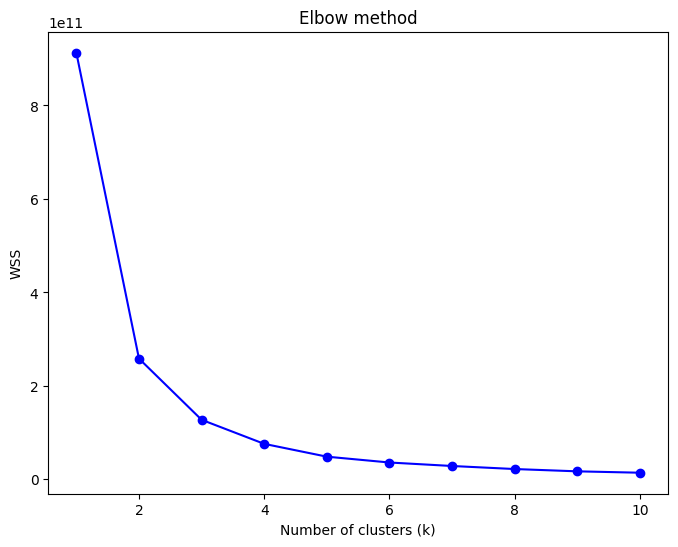

In [11]:
X_clean = df_clean.drop(columns=['ID','Dt_Customer'])

wss = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_clean)
    wss.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, wss, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSS")
plt.title("Elbow method")
plt.show()

In [12]:
optimal_k = 3 
kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
labels_opt = kmeans_opt.fit_predict(X_clean)

silhouette_opt = silhouette_score(X_clean, labels_opt)
print(f"Silhouette (k={optimal_k}):", silhouette_opt)

Silhouette (k=3): 0.5548776024937375


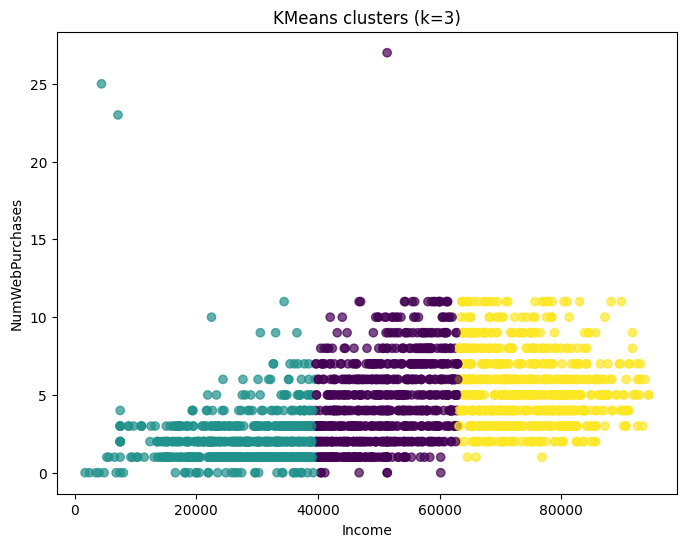

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean['Income'], df_clean['NumWebPurchases'], c=labels_opt, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.title(f"KMeans clusters (k={optimal_k})")
plt.show()

**For this dataset, it is better to use the unscaled cleaned data, because they produce a higher silhouette score and more logical segments (income indeed distinguishes customers well).**

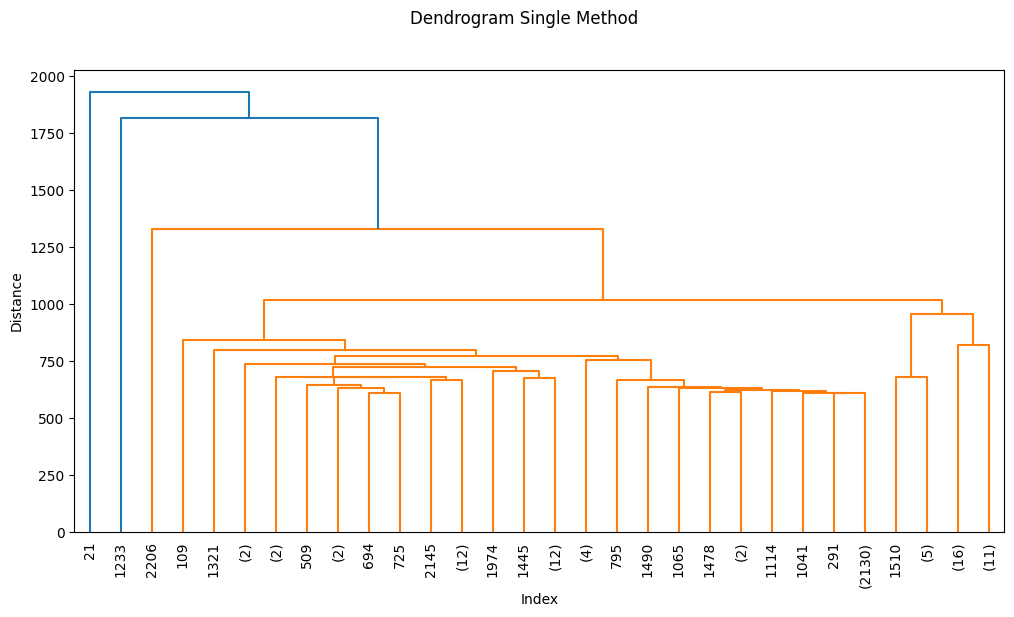

In [14]:
dist_sin = linkage(X_clean, method='single')

plt.figure(figsize=(12,6))
dendrogram(dist_sin, truncate_mode='lastp', leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method")
plt.show()

In [15]:
df_clean['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
df_clean['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

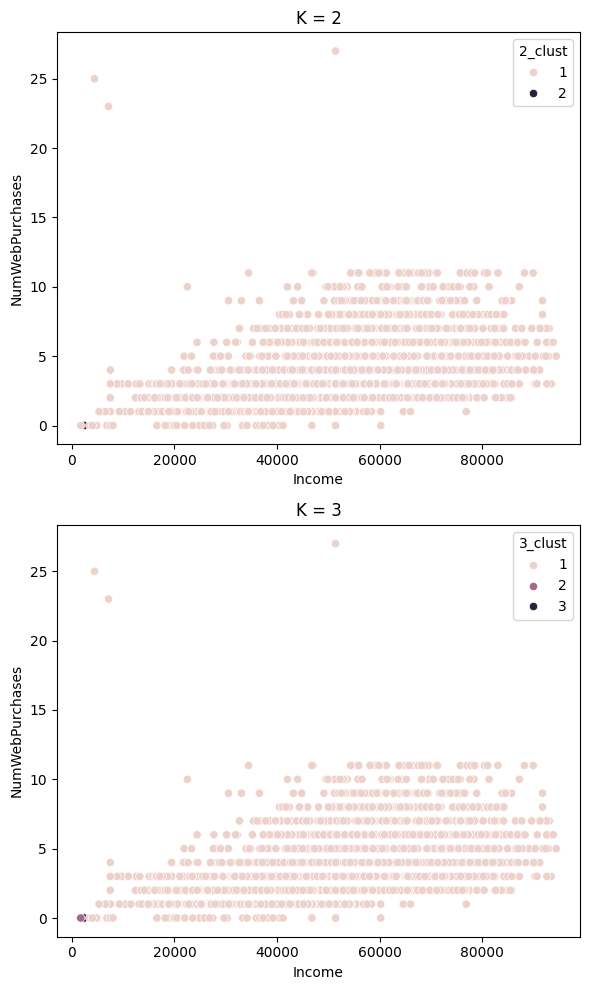

In [16]:
plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
plt.title("K = 2")
sns.scatterplot(
    x="Income", y="NumWebPurchases",
    data=df_clean, hue="2_clust"
)

plt.subplot(2,1,2)
plt.title("K = 3")
sns.scatterplot(
    x="Income", y="NumWebPurchases",
    data=df_clean, hue="3_clust"
)

plt.tight_layout();

In [17]:
sil_2 = silhouette_score(X_clean, df_clean['2_clust'])
sil_3 = silhouette_score(X_clean, df_clean['3_clust'])

print("Silhouette (2 clusters):", sil_2)
print("Silhouette (3 clusters):", sil_3)

Silhouette (2 clusters): 0.4246534259134259
Silhouette (3 clusters): 0.4252963075899061


**The silhouette score indicates a moderate level of quality, and in the visualizations the clusters are not clearly separated. Compared to KMeans, the clusters appear much less interpretable.**

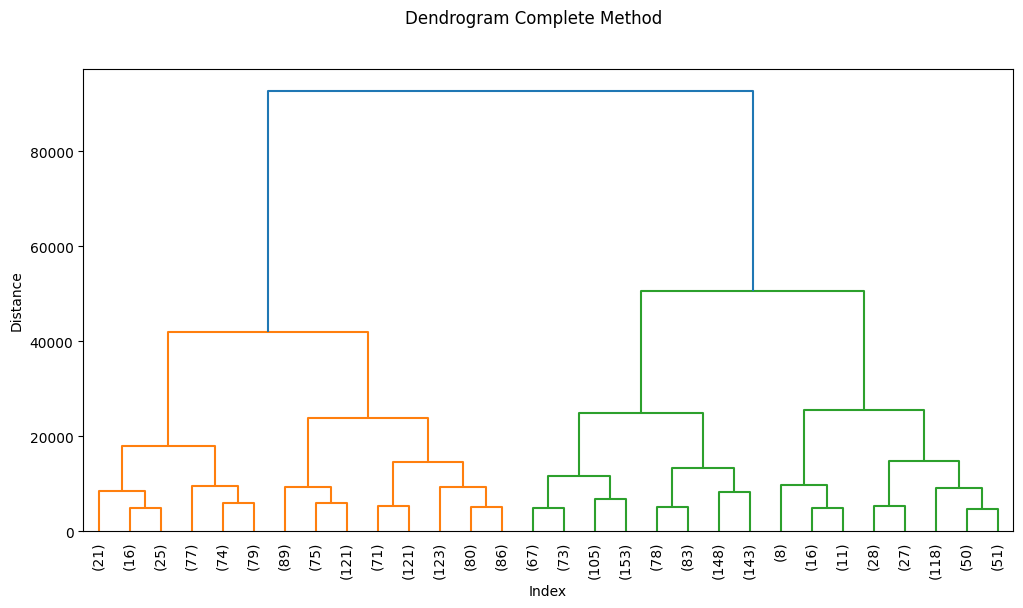

In [18]:
dist_comp = linkage(X_clean, method="complete")

plt.figure(figsize=(12,6))
dendrogram(dist_comp, truncate_mode='lastp', leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method")
plt.show()

df_clean['2_clust_CM'] = fcluster(dist_comp, 2, criterion='maxclust')
df_clean['3_clust_CM'] = fcluster(dist_comp, 3, criterion='maxclust')

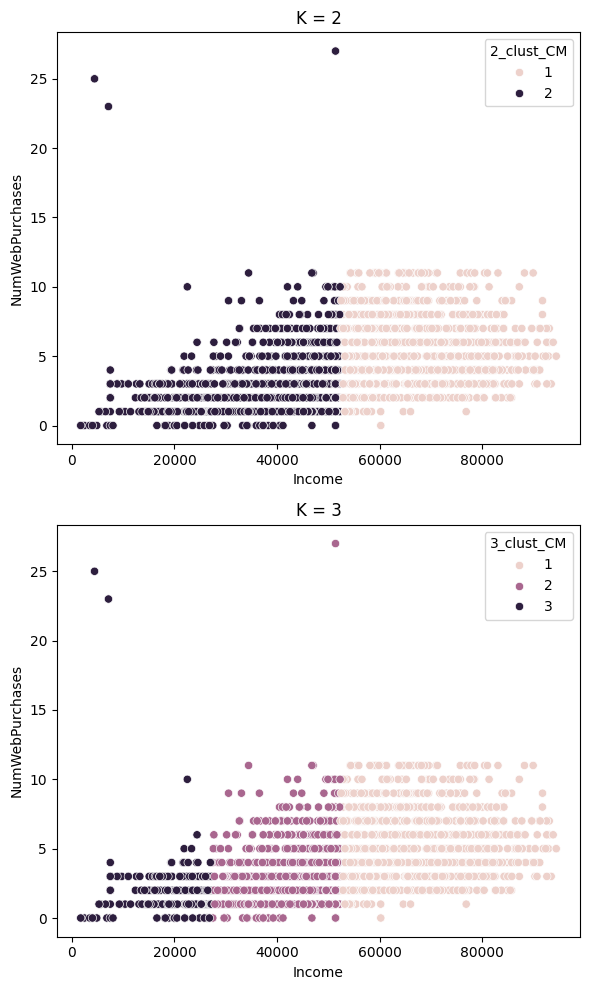

In [19]:
plt.figure(figsize=(6,10))

plt.subplot(2,1,1)
plt.title("K = 2")
sns.scatterplot(x="Income", y="NumWebPurchases", data=df_clean, hue="2_clust_CM")

plt.subplot(2,1,2)
plt.title("K = 3")
sns.scatterplot(x="Income", y="NumWebPurchases", data=df_clean, hue="3_clust_CM")

plt.tight_layout();

In [20]:
sil_2_cm = silhouette_score(X_clean, df_clean['2_clust_CM'])
sil_3_cm = silhouette_score(X_clean, df_clean['3_clust_CM'])

print("Silhouette (Complete linkage, 2 clusters):", sil_2_cm)
print("Silhouette (Complete linkage, 3 clusters):", sil_3_cm)

Silhouette (Complete linkage, 2 clusters): 0.6044806897857807
Silhouette (Complete linkage, 3 clusters): 0.5306568914932632


**The Complete linkage method for agglomerative clustering turned out to be the most successful among the tested ones. The clusters are well interpretable, and the silhouette score is higher than in KMeans and Single linkage.**

Number of clusters DBSCAN: 3
Silhouette DBSCAN: 0.4496905147196437


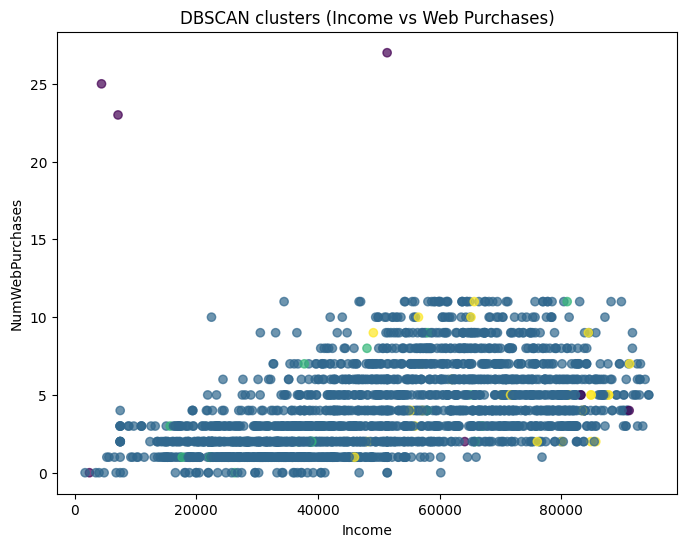

In [21]:
X_scaled = StandardScaler().fit_transform(X_clean)

dbscan = DBSCAN(eps=8, min_samples=15)
db_labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print("Number of clusters DBSCAN:", n_clusters)

if n_clusters > 1:
    print("Silhouette DBSCAN:", silhouette_score(X_scaled, db_labels))
else:
    print("Silhouette DBSCAN: impossible to calculate")

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Income'], df_clean['NumWebPurchases'], c=db_labels, alpha=0.7)
plt.xlabel("Income")
plt.ylabel("NumWebPurchases")
plt.title("DBSCAN clusters (Income vs Web Purchases)")
plt.show()

**For marketing segmentation, DBSCAN is not effective, though it can be used as an additional tool for detecting anomalous customers.**